In [326]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import graphviz 
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

In [327]:
# Reading a CSV file into a pandas DataFrame
df = pd.read_csv('../input/glass/glass.csv')

In [328]:
# Displays the first few rows of the DataFrame
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [329]:
# Generates statistics summarizing the DataFrame
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<Axes: xlabel='Type', ylabel='count'>

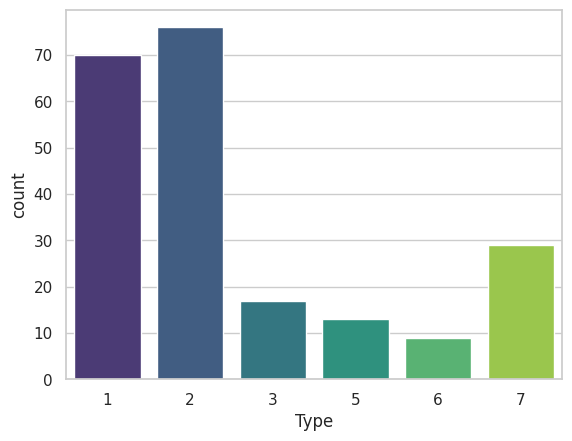

In [330]:
# Counts occurrences of each unique value in the 'Type' column of the DataFrame 'df'
df['Type'].value_counts()

# Calculates the percentage of each unique value in the 'Type' column relative to the total number of rows in 'df'
df['Type'].value_counts() * 100 

# Creates a countplot of the 'Type' column, showing the frequency of each value using seaborn (sns) library with the 'viridis' color palette
sns.countplot(x='Type', data=df, palette='viridis')

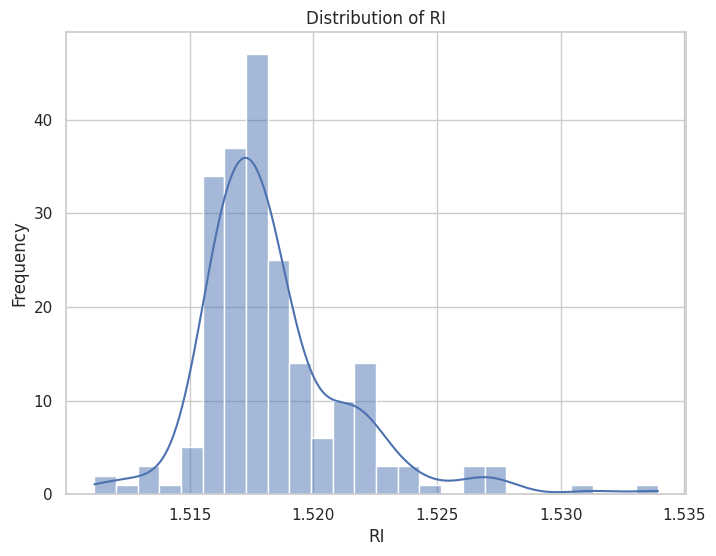

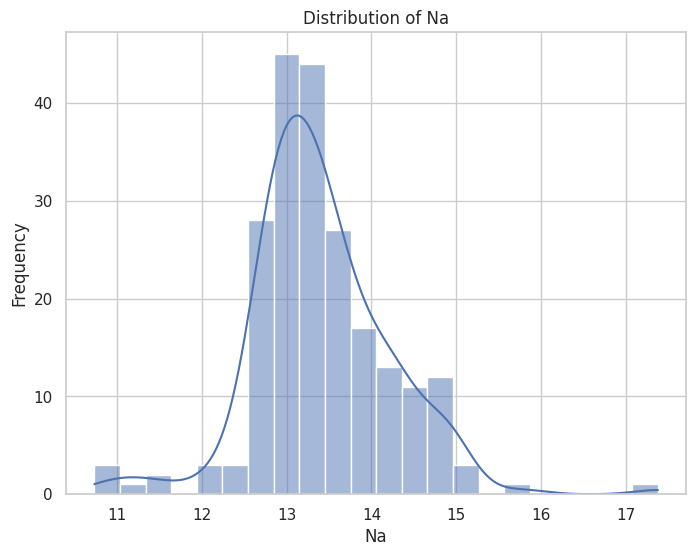

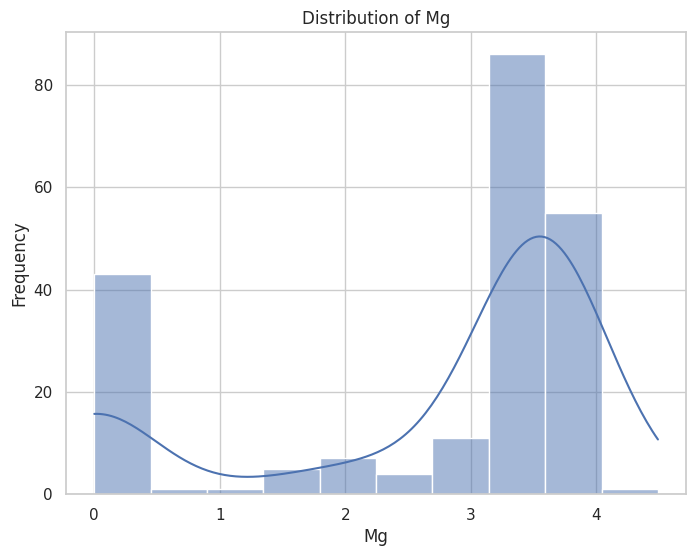

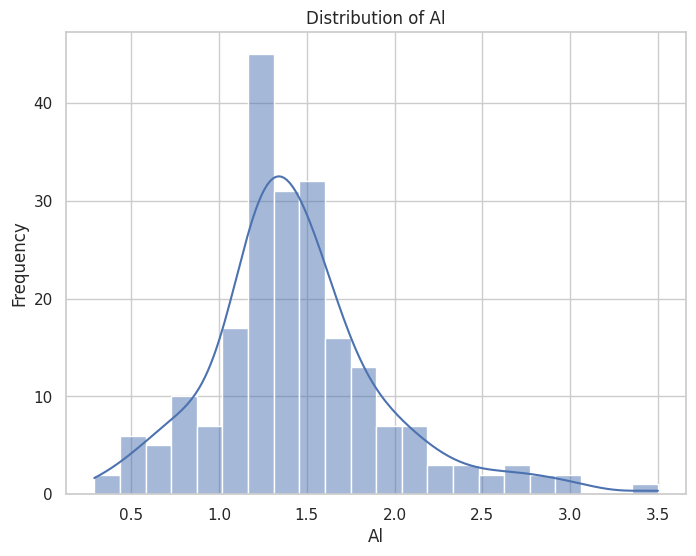

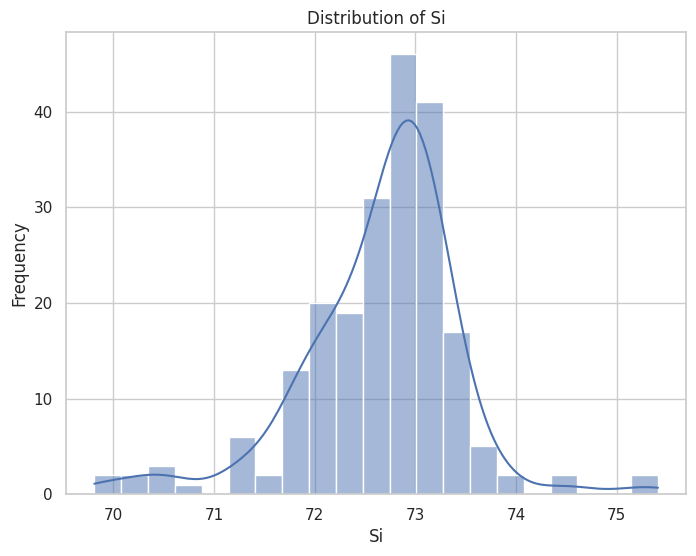

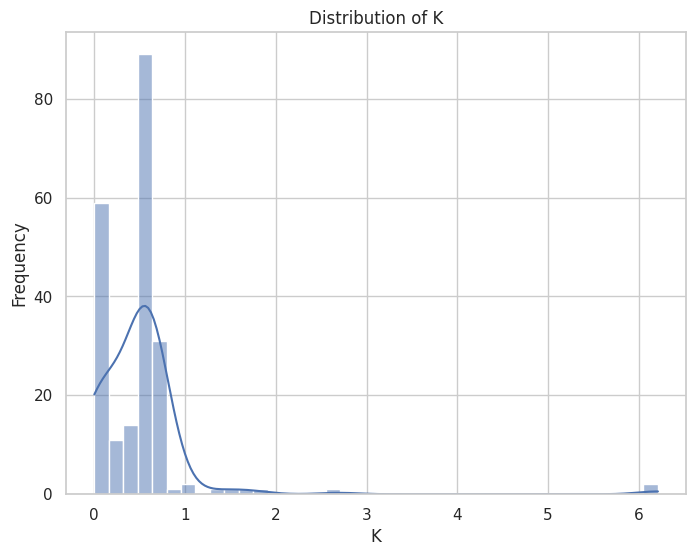

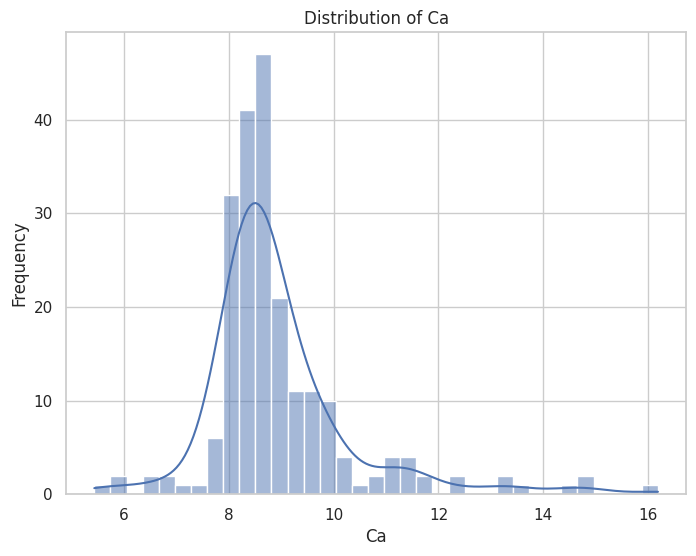

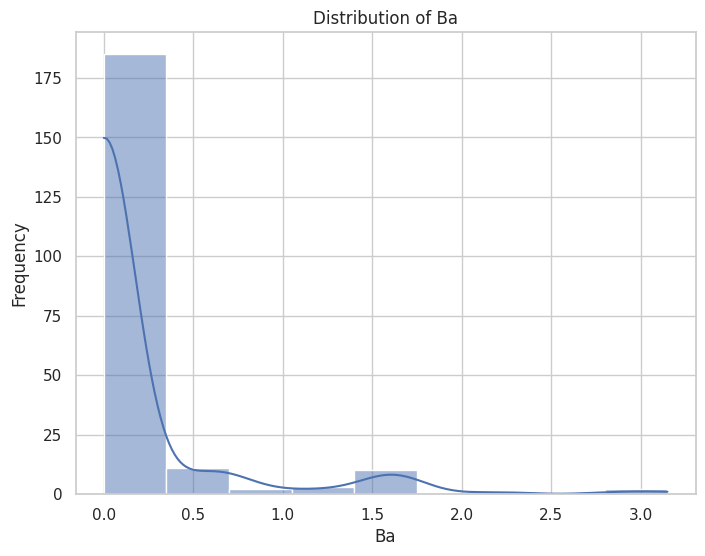

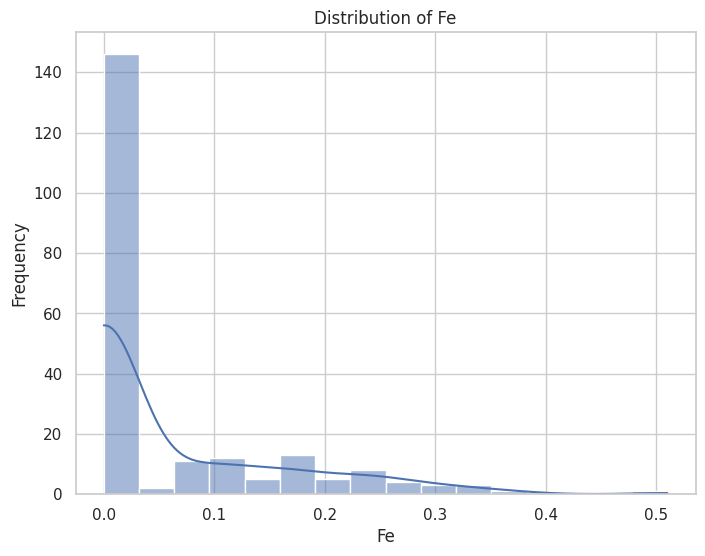

In [331]:
# Creates a new DataFrame 'df_numeric' by dropping the column 'Type' along the specified axis (axis=1 indicates columns)
df_numeric = df.drop('Type', axis=1)

# Sets the style for seaborn plots to 'whitegrid'
sns.set(style="whitegrid")

# Iterates through each column in 'df_numeric' and plots a histogram using seaborn for each numeric column
for column in df_numeric.columns:
    # Creates a new figure with specified size
    plt.figure(figsize=(8, 6))
    # Generates a histogram with kernel density estimation (kde=True) using seaborn's histplot
    sns.histplot(df[column], kde=True)
    # Sets the title of the plot based on the column being plotted
    plt.title(f'Distribution of {column}')
    # Labels the x-axis with the column name
    plt.xlabel(column)
    # Labels the y-axis as 'Frequency'
    plt.ylabel('Frequency')
    # Displays the plot
    plt.show()

In [332]:
# Creates a new DataFrame 'X' by dropping the column 'Type' from the original DataFrame 'df'
X = df.drop(columns=['Type'])
# Creates a Series 'y' containing only the values from the 'Type' column in the original DataFrame 'df'
y = df['Type']

In [333]:
# Initializes an oversampling method using SMOTE (Synthetic Minority Over-sampling Technique)
oversample = SMOTE()
# Applies the oversampling technique to the features (X) and target variable (y) to balance the classes
X, y = oversample.fit_resample(X, y)

In [334]:
# Splits the data into training and testing sets using a 70-30 split and a specified random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=451)

**Decision Tree (Gini)**

In [335]:
# Initializes a Decision Tree Classifier using the Gini criterion for impurity measurement
clf_gini = DecisionTreeClassifier(criterion="gini")

In [336]:
# Fits the Decision Tree Classifier using the Gini criterion to the training data
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [337]:
# Generates predictions using the fitted Decision Tree Classifier (Gini criterion) on the test data
y_pred_gini = clf_gini.predict(X_test)

In [338]:
# Calculate the accuracy using
accuracy_gini = accuracy_score(y_test, y_pred_gini)
# Print the calculated accuracy
print("Accuracy (Gini impurity):", accuracy_gini)

Accuracy (Gini impurity): 0.8321167883211679


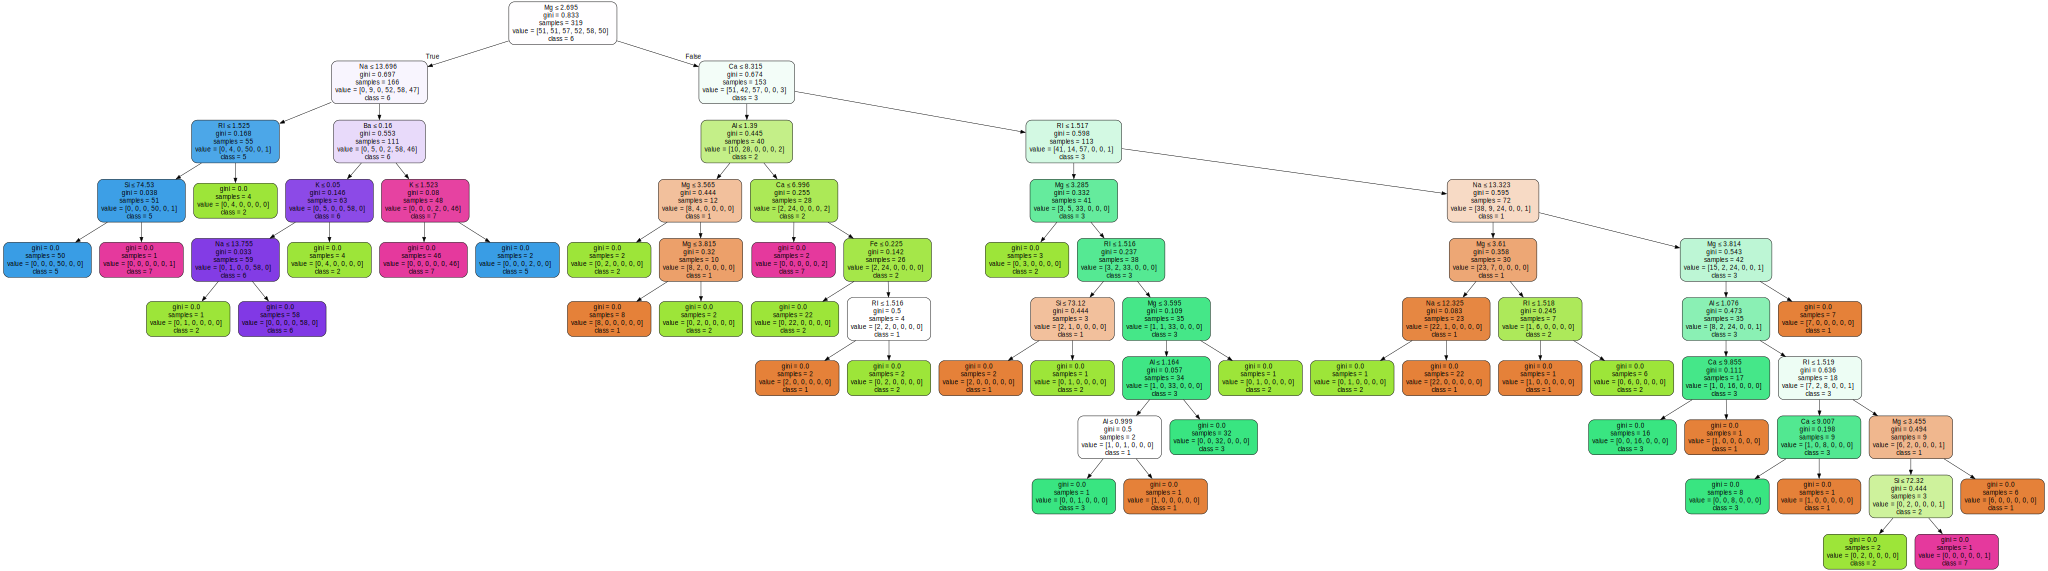

In [339]:
# Convert the y_train labels to string format
y_train_str = y_train.astype(str)

# Generate graphviz data to visualize the decision tree trained with Gini impurity criterion
dot_data = export_graphviz(clf_gini, out_file=None,
                           feature_names=X_train.columns,
                           class_names=np.unique(y_train_str),
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph visualization based on the graphviz data generated above
graph = graphviz.Source(dot_data) 

# Display the decision tree visualization
graph

**Decision tree (Entropy)**

In [340]:
# Initialize a Decision Tree Classifier using the entropy criterion
clf_entropy = DecisionTreeClassifier(criterion="entropy")

In [341]:
# Train the Decision Tree Classifier with the training data using the entropy criterion
clf_entropy.fit(X_train, y_train)
# Make predictions on the test set using the trained entropy-based classifier
y_pred_entropy = clf_entropy.predict(X_test)

In [342]:
# Calculate the accuracy score based on predictions using the entropy-based classifier
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
# Print the accuracy
print("Accuracy (Entropy):", accuracy_entropy)

Accuracy (Entropy): 0.7883211678832117


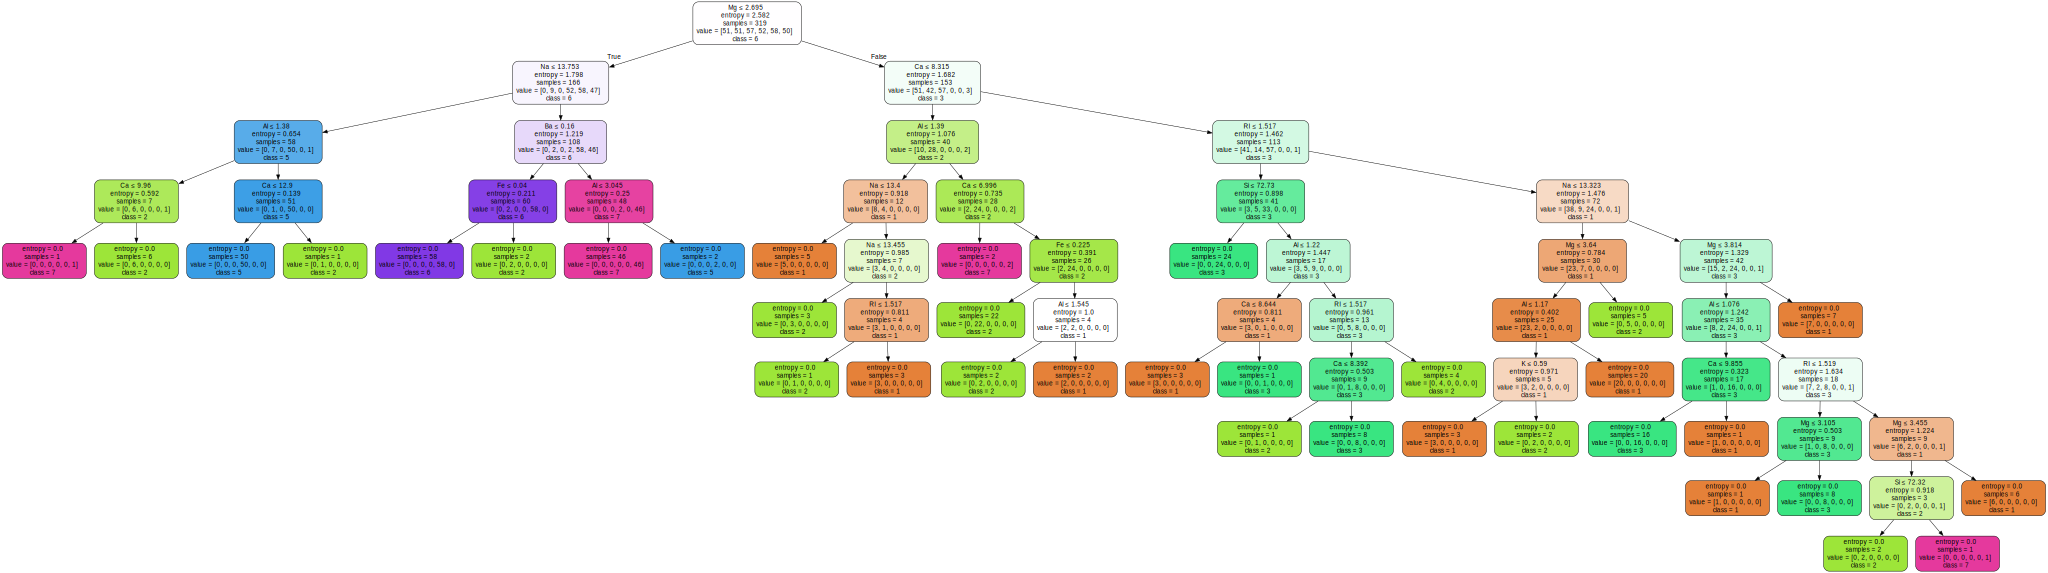

In [343]:
# Convert the y_train labels to string format
y_train_str = y_train.astype(str)

# Generate graphviz data to visualize the decision tree trained with entropy criterion
dot_data = export_graphviz(clf_entropy, out_file=None,
                           feature_names=X_train.columns,
                           class_names=np.unique(y_train_str),
                           filled=True, rounded=True,
                           special_characters=True)

# Create a graph visualization based on the graphviz data generated above
graph = graphviz.Source(dot_data) 

# Display the decision tree visualization
graph

**Random forest**

In [344]:
# Create a Random Forest Classifier with 100 decision trees
clf_forest = RandomForestClassifier(n_estimators = 100)

In [345]:
# Train the Random Forest Classifier using the training data
clf_forest.fit(X_train, y_train)
# Make predictions on the test set using the trained Random Forest Classifier
y_pred_forest = clf_forest.predict(X_test)

In [346]:
# Calculate the accuracy score based on predictions using the Random Forest Classifier
accuracy_rf = accuracy_score(y_test, clf_forest.predict(X_test))
# Print the accuracy associated with the Random Forest Classifier
print("Accuracy (Random Forest):", accuracy_rf)

Accuracy (Random Forest): 0.8832116788321168


**Gradient**

In [347]:
# Create a Gradient Boosting Classifier with specific parameters
# - n_estimators: Determines the number of boosting stages (100 in this case)
# - learning_rate: Controls the contribution of each tree (set to 1.0 for strong influence)
# - max_depth: Sets the maximum depth of individual trees (100, leading to potentially deep trees)
clf_grad = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=100)

In [348]:
# Fit the GradientBoostingClassifier on the training data
clf_grad.fit(X_train, y_train)
# Predict using the trained GradientBoostingClassifier on the test data
y_pred_grad = clf_grad.predict(X_test)

In [349]:
accuracy_grad = accuracy_score(y_test, clf_grad.predict(X_test))
print("Accuracy (Gradient Boosting):", accuracy_grad)

Accuracy (Gradient Boosting): 0.8613138686131386


**Support Vector Machine**

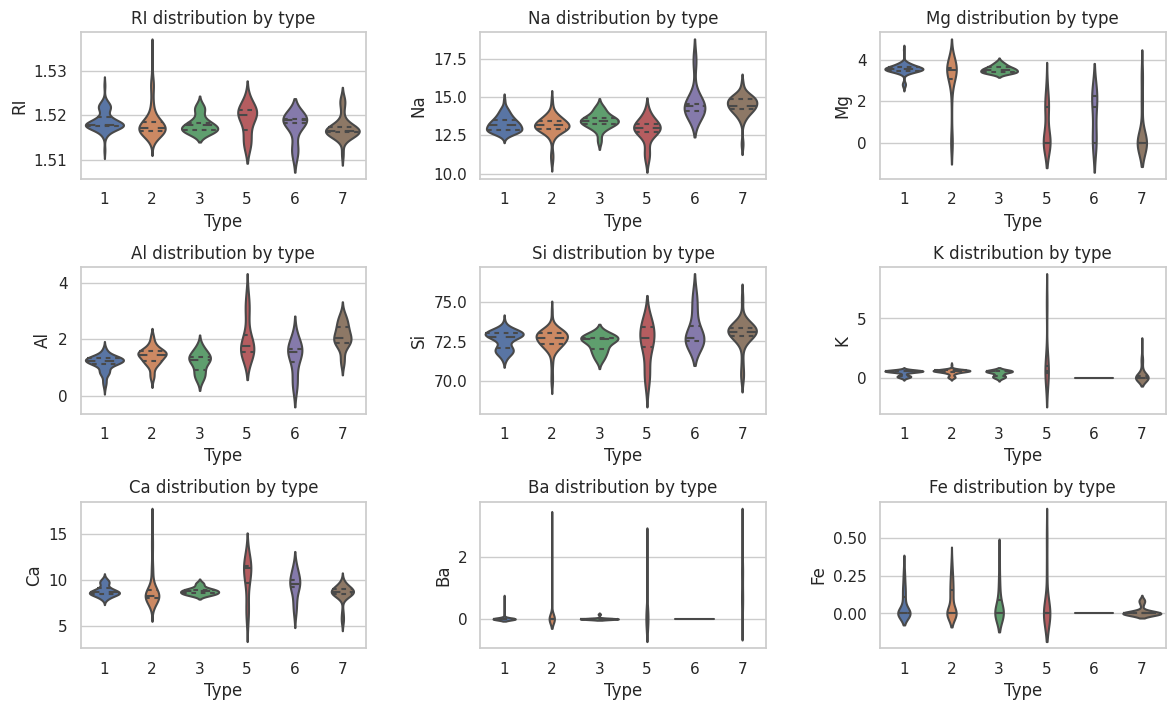

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specific size
plt.figure(figsize=(14, 8))

# Loop through each column in the DataFrame except the last one
for i, column in enumerate(df.columns[:-1]):
    # Create subplots in a 3x3 grid and incrementally place each plot
    plt.subplot(3, 3, i + 1)
    
    # Create a violin plot for the current numerical column against the 'Type' column
    sns.violinplot(x='Type', y=column, data=df, inner='quartile')
    
    # Set title for each subplot indicating the distribution of the current column across 'Type'
    plt.title(f'{column} distribution by type')

# Adjust the spacing between subplots horizontally and vertically
plt.subplots_adjust(wspace=0.4, hspace=0.6)

# Display the grid of violin plots
plt.show()

In [351]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler object
sc_X = StandardScaler()

# Scale (normalize) the features in the training set (X_train) using mean and standard deviation
X_train = sc_X.fit_transform(X_train)

# Apply the same transformation to the test set (X_test) using the parameters learned from the training set
X_test = sc_X.transform(X_test)

In [352]:
from sklearn import svm

# Initialize an SVM classifier with a linear kernel
clf_svm = svm.SVC(kernel='linear')

# Train the SVM classifier using the training data
clf_svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = clf_svm.predict(X_test)

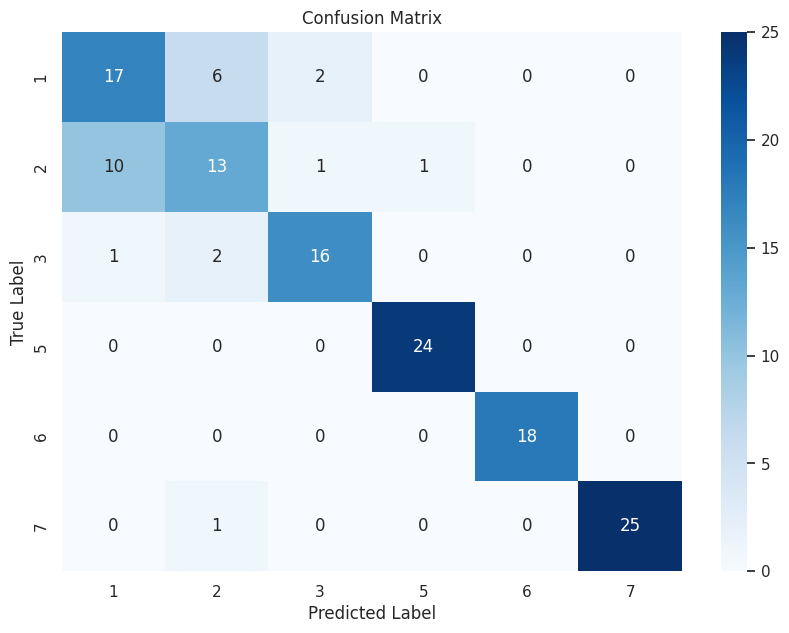

In [353]:
from sklearn.metrics import confusion_matrix

# Define the labels for the confusion matrix
labels = [1, 2, 3, 5, 6, 7]

# Generate the confusion matrix using predicted and true labels along with the specified labels
cm = confusion_matrix(y_test, y_pred_svm, labels=labels)

# Create a figure for the heatmap with a specific size
plt.figure(figsize=(10, 7))

# Generate a heatmap to visualize the confusion matrix
# annot=True adds the numerical annotation to the cells, fmt="d" formats annotation as integer
# cmap="Blues" sets the color scheme to shades of blue
# xticklabels and yticklabels are set to the specified labels for better readability
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

# Set title, x-axis label, and y-axis label for the heatmap
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Display the heatmap
plt.show()

In [354]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy: ", accuracy_svm)

# Calculate precision: ratio of correctly predicted positive observations to the total predicted positives
# 'weighted' calculates metrics for each label and finds their average weighted by support (the number of true instances for each label)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
print("Precision:", precision_svm)

# Calculate recall: ratio of correctly predicted positive observations to all actual positives
# 'weighted' calculates metrics for each label and finds their average weighted by support (the number of true instances for each label)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
print("Recall:", recall_svm)

Accuracy:  0.8248175182481752
Precision: 0.8247540051189686
Recall: 0.8248175182481752


**K-Nearest Neighbor(KNN)**

In [355]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize a KNN classifier with 5 neighbors
cf_knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier using the training data
cf_knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = cf_knn.predict(X_test)

In [356]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy: ", accuracy_knn)

Accuracy:  0.8394160583941606


In [357]:
# Create a list of k values from 1 to 30
k_values = [i for i in range(1, 31)]

# Create an empty list to store mean cross-validation scores
scores = []

# Iterate through each k value
for k in k_values:
    # Initialize a KNN classifier for the current k value
    cf_knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform k-fold cross-validation (cv=5 means 5-fold cross-validation)
    score = cross_val_score(cf_knn, X, y, cv=5)
    
    # Calculate the mean of cross-validation scores and append to the scores list
    scores.append(np.mean(score))


Text(0, 0.5, 'Accuracy Score')

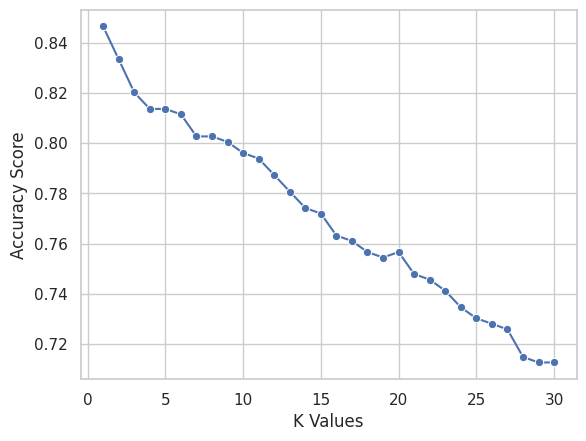

In [358]:
# Plot a line plot using Seaborn
# x=k_values sets the x-axis values as the k values
# y=scores sets the y-axis values as the corresponding mean cross-validation scores
# marker='o' sets markers on the line at each data point
sns.lineplot(x=k_values, y=scores, marker='o')

# Set label for the x-axis
plt.xlabel("K Values")

# Set label for the y-axis
plt.ylabel("Accuracy Score")

In [359]:
# Find the index of the maximum score in the scores list
best_index = np.argmax(scores)

# Get the corresponding best k value using the index
best_k = k_values[best_index]

# Initialize a KNN classifier with the best k value
cfg_knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the KNN classifier using the training data
cfg_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [360]:
# Generate predictions on the test data using the KNN classifier with optimal k
y_pred_knncv = cfg_knn.predict(X_test)

# Calculate accuracy: fraction of correctly predicted samples
accuracy_knncv = accuracy_score(y_test, y_pred_knncv)
print("Accuracy:", accuracy_knncv)

# Calculate precision: ratio of correctly predicted positive observations to the total predicted positives
# 'weighted' calculates metrics for each label and finds their average weighted by support (the number of true instances for each label)
precision_knncv = precision_score(y_test, y_pred_knncv, average='weighted')
print("Precision:", precision_knncv)

# Calculate recall: ratio of correctly predicted positive observations to all actual positives
# 'weighted' calculates metrics for each label and finds their average weighted by support (the number of true instances for each label)
recall_knncv = recall_score(y_test, y_pred_knncv, average='weighted')
print("Recall:", recall_knncv)

Accuracy: 0.8905109489051095
Precision: 0.8891302668674931
Recall: 0.8905109489051095


In [361]:
# Create a DataFrame to display model accuracies and sort them by accuracy score
results = pd.DataFrame([
                       ["Decision Tree Classifier Gini",accuracy_gini*100],
                        ["Decision Tree Classifier Entropy",accuracy_entropy*100],
                        ["Random Forest Classifier",accuracy_rf*100],
                        ["GradientBoosting Classifier",accuracy_grad*100],
                        ["SVM",accuracy_svm*100],
                        ["KNN",accuracy_knn*100],
                        ["KNN with CV",accuracy_knncv*100]
                       ],columns = ["Models","Accuracy Score"]).sort_values(by='Accuracy Score',ascending=False)

# Apply a background gradient to the DataFrame for visualization
results.style.background_gradient(cmap='Blues')

,Models,Accuracy Score
6,KNN with CV,89.051095
2,Random Forest Classifier,88.321168
3,GradientBoosting Classifier,86.131387
5,KNN,83.941606
0,Decision Tree Classifier Gini,83.211679
4,SVM,82.481752
1,Decision Tree Classifier Entropy,78.832117
